<a href="https://colab.research.google.com/github/mleyvaz/vision-computadoras/blob/main/Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Técnicas embedding para clasificación de imágenes

Los modelos de aprendizaje profundo se utilizan para calcular un vector de características para cada imagen. Devuelve una tabla de datos mejorada con columnas adicionales (descriptores de imagen).

In [1]:
!pip install -U image_embeddings # don't run this line if running this directly in the repo

     |████████████████████████████████| 92kB 3.5MB/s 
     |████████████████████████████████| 7.0MB 5.7MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
  Created wheel for image-embeddings: filename=image_embeddings-1.4.0-cp36-none-any.whl size=13140 sha256=fb4dd6d88b04e9eeae4bd44ea5b5bb10f171e6c8746c03aec57d98060166ec16
  Stored in directory: /root/.cache/pip/wheels/ed/4b/03/d57a2985ed7c15388608e4d73fc2e70a15b65b1a5518af5a61
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115928 sha256=95d1faa900914998471a8565191d65244bce3340f4174f8f8843dd33f4c1cca3
  Stored in directory: /root/.cache/pip/wheels/af/19/30/1ea0cad502dcb4e66ed5a690279628c827aea38bbbab75d5ed
Successfully built image-embeddings fire


In [2]:
import image_embeddings

In [3]:
# Let's define some paths where to save images, tfrecords and embeddings
from pathlib import Path
home = str(Path.home())
dataset = "tf_flowers"
path_images = f"{home}/{dataset}/images"
path_tfrecords = f"{home}/{dataset}/tfrecords"
path_embeddings = f"{home}/{dataset}/embeddings"

In [4]:
image_embeddings.downloader.save_examples_to_folder(output_folder=path_images, images_count=1000, dataset=dataset)
image_embeddings.inference.write_tfrecord(image_folder=path_images,
                                          output_folder=path_tfrecords,
                                          num_shards=10)

INFO:absl:Load pre-computed DatasetInfo (eg: splits, num examples,...) from GCS: tf_flowers/3.0.1
INFO:absl:Load dataset info from /tmp/tmp4mzwojmltfds
INFO:absl:Generating dataset tf_flowers (/root/tensorflow_datasets/tf_flowers/3.0.1)


local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



INFO:absl:Load dataset info from /root/tensorflow_datasets/tf_flowers/3.0.1.incomplete4RJGQW
INFO:absl:Constructing tf.data.Dataset for split train, from /root/tensorflow_datasets/tf_flowers/3.0.1




Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
Shard 0 saved after 0s
Shard 1 saved after 0s
Shard 2 saved after 0s
Shard 3 saved after 0s
Shard 4 saved after 1s
Shard 5 saved after 1s
Shard 6 saved after 1s
Shard 7 saved after 1s
Shard 8 saved after 1s
Shard 9 saved after 1s


In [6]:
image_embeddings.inference.run_inference(tfrecords_folder=path_tfrecords,
                                         output_folder=path_embeddings,
                                         batch_size=1000)

1/1 [==============================] - 9s 9s/step

Shard 0 done after 9s
Shard 0 saved after 9s
1/1 [==============================] - 7s 7s/step

Shard 1 done after 16s
Shard 1 saved after 16s
1/1 [==============================] - 6s 6s/step

Shard 2 done after 22s
Shard 2 saved after 22s
1/1 [==============================] - 6s 6s/step

Shard 3 done after 29s
Shard 3 saved after 29s
1/1 [==============================] - 6s 6s/step

Shard 4 done after 35s
Shard 4 saved after 36s
1/1 [==============================] - 6s 6s/step

Shard 5 done after 42s
Shard 5 saved after 42s
1/1 [==============================] - 6s 6s/step

Shard 6 done after 48s
Shard 6 saved after 49s
1/1 [==============================] - 6s 6s/step

Shard 7 done after 55s
Shard 7 saved after 55s
1/1 [==============================] - 6s 6s/step

Shard 8 done after 62s
Shard 8 saved after 62s
1/1 [==============================] - 6s 6s/step

Shard 9 done after 68s
Shard 9 saved after 68s


In [8]:
[id_to_name, name_to_id, embeddings] = image_embeddings.knn.read_embeddings(path_embeddings)
index = image_embeddings.knn.build_index(embeddings)

Buscar las más cercana

image_sunflowers_804


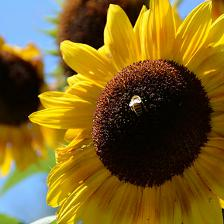

In [35]:
#@title Texto de título predeterminado { run: "auto", vertical-output: true }
imagen = 175 #@param {type:"slider", min:1, max:225, step:1}

print(id_to_name[imagen])
image_embeddings.knn.display_picture(path_images, id_to_name[imagen])
results = image_embeddings.knn.search(index, id_to_name, embeddings[imagen])
image_embeddings.knn.display_results(path_images, results)